In [60]:
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline
import contextily as cx
import math
import numpy as np
import pandas as pd

In [61]:
gdf = gpd.read_file('/Users/ryanswart/Projects/PyProjects/DataTransfer/all_attrs_old')

In [3]:
def percent_change(col1,col2):
    return ((col2 - col1) / col1) * 100

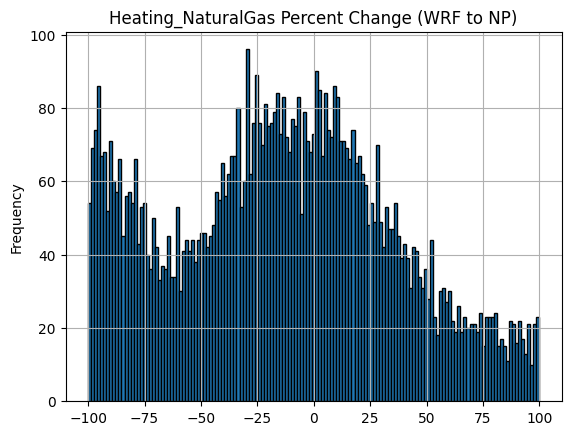

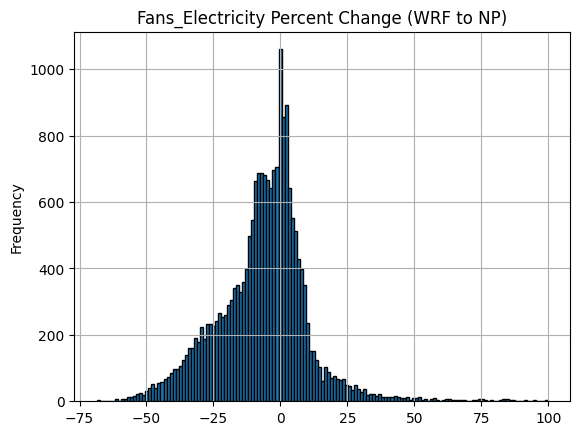

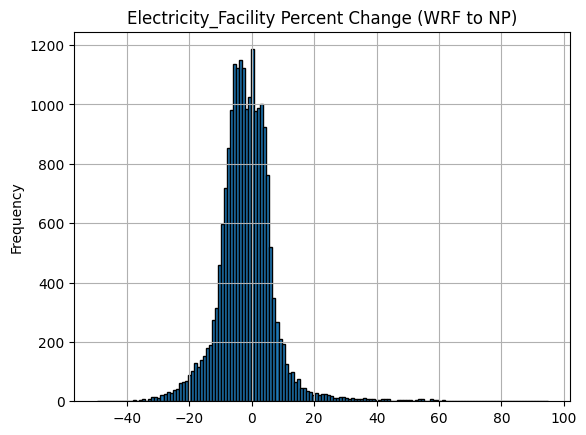

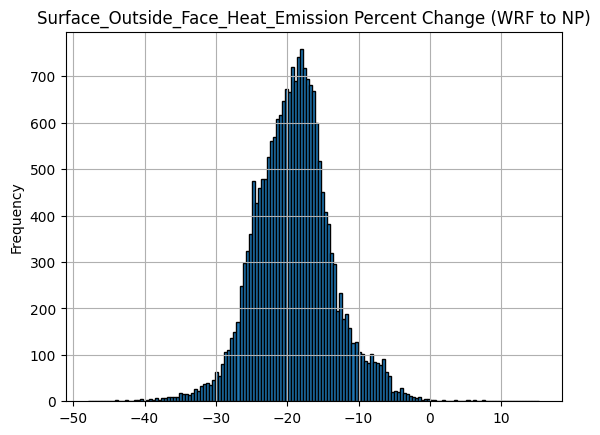

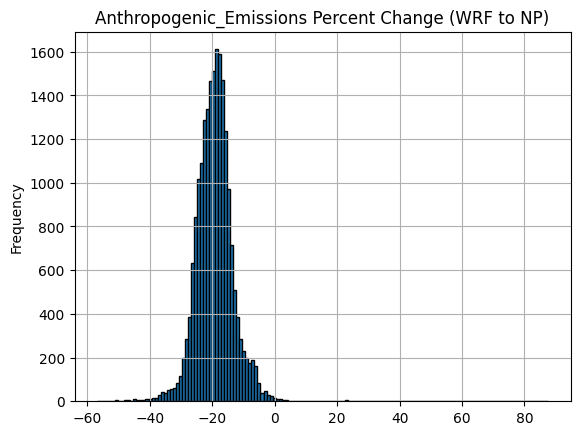

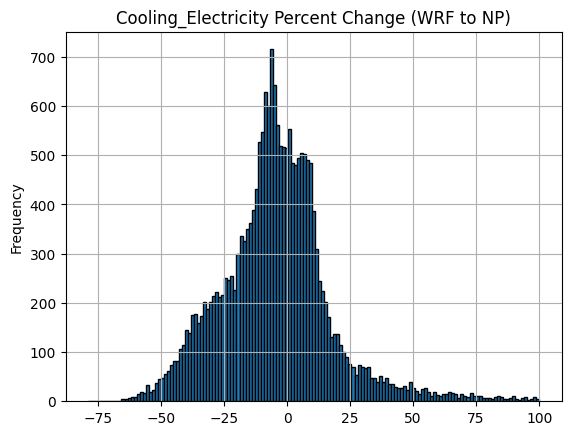

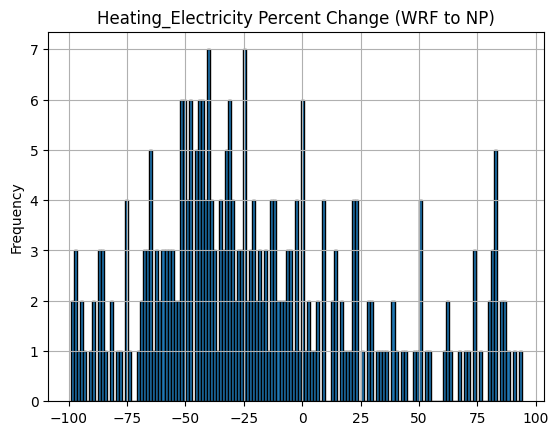

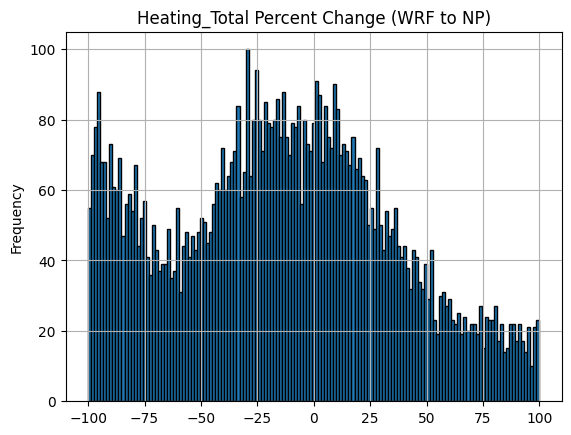

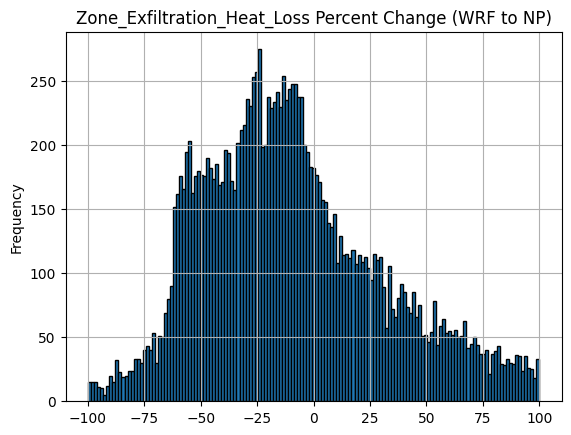

In [83]:
# get all of our percent change (WRF to NP) data

cols_dict = {
    'Heating_NaturalGas': ('Heating_Na', 'Heating__2'),
    'Fans_Electricity': ('Fans_Elect', 'Fans_Ele_1'),
    'Electricity_Facility': ('Electricit', 'Electric_1'),
    'Surface_Outside_Face_Heat_Emission': ('Surface_Ou', 'Surface__1'),
    'Anthropogenic_Emissions': ('Anthropoge', 'Anthropo_1'),
    'Cooling_Electricity': ('Cooling_El', 'Cooling__1'),
    'Heating_Electricity': ('Heating_El', 'Heating__1'),
    'Heating_Total': ('Heating_To', 'Heating__3'),
    'Zone_Exfiltration_Heat_Loss': ('Zone_Exfil', 'Zone_Exf_1'),
}

for key, val in cols_dict.items():
    gdf[f'{key}_change'] = percent_change(gdf[val[0]], gdf[val[1]])
    # first_quartile = gdf[f'{key}_change'].quantile(0.1)
    # third_quartile = gdf[f'{key}_change'].quantile(0.9)
    # print(gdf[(gdf[f'{key}_change'] < third_quartile) & (gdf[f'{key}_change'] > first_quartile)][f'{key}_change'].count())
    ax = gdf[(gdf[f'{key}_change'] < 100) & (gdf[f'{key}_change'] > -100)][f'{key}_change'].plot.hist(edgecolor='black', bins=math.floor(math.sqrt(len(gdf.index))) + 5)
    ax.set_title(f'{key} Percent Change (WRF to NP)')
    ax.grid()
    plt.show()

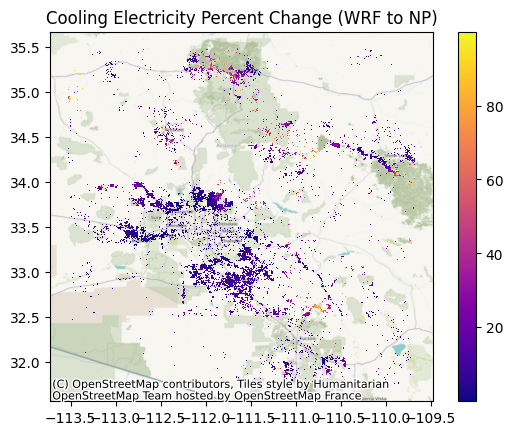

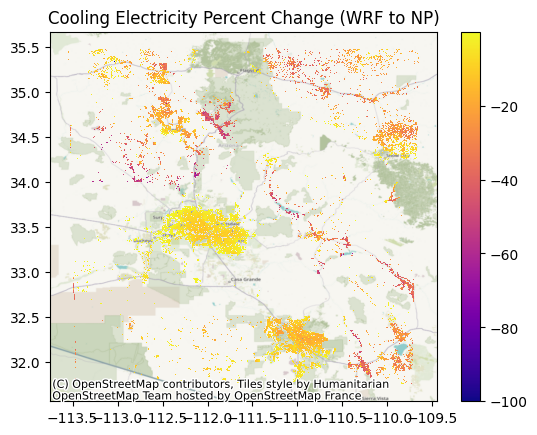

In [5]:
# show that cooling change is an urban vs rural thing

ax = gdf[(gdf['Cooling_Electricity_change'] < 100) & (gdf['Cooling_Electricity_change'] > 0)].plot(column='Cooling_Electricity_change', legend=True, cmap='plasma')
cx.add_basemap(ax, crs="epsg:4326")
ax.set_title('Cooling Electricity Percent Change (WRF to NP)')

ax = gdf[gdf['Cooling_Electricity_change'] < 0].plot(column='Cooling_Electricity_change', legend=True, cmap='plasma')
cx.add_basemap(ax, crs="epsg:4326")
ax.set_title('Cooling Electricity Percent Change (WRF to NP)')
plt.show()

Text(0.5, 1.0, 'Electricity Facility Percent Change (WRF to NP)')

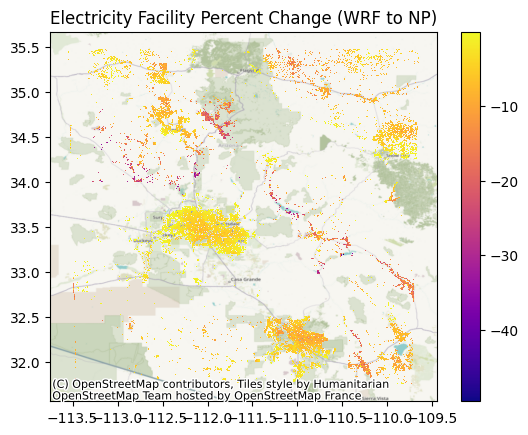

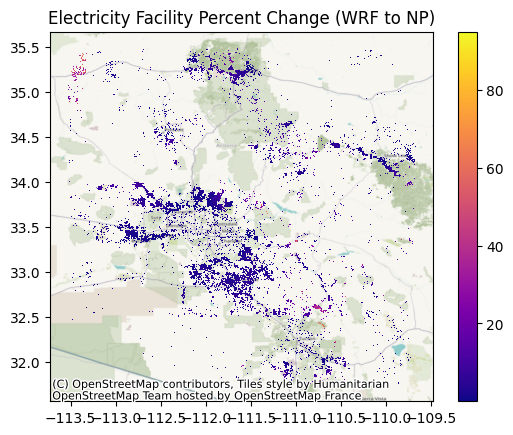

In [6]:
ax = gdf[gdf['Electricity_Facility_change'] < 0].plot(column='Electricity_Facility_change', legend=True, cmap='plasma')
ax.set_title('Electricity Facility Percent Change (WRF to NP)')
cx.add_basemap(ax, crs="epsg:4326")

ax = gdf[gdf['Electricity_Facility_change'] > 0].plot(column='Electricity_Facility_change', legend=True, cmap='plasma')
cx.add_basemap(ax, crs="epsg:4326")
ax.set_title('Electricity Facility Percent Change (WRF to NP)')

Text(0.5, 1.0, 'Fans Electricity Percent Change (WRF to NP)')

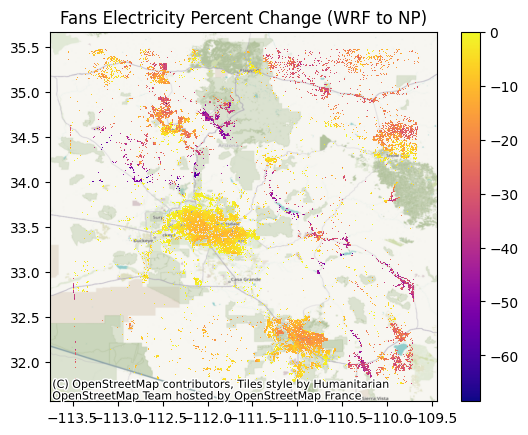

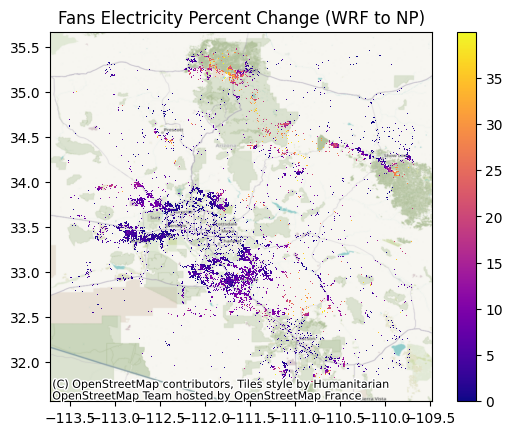

In [7]:
ax = gdf[gdf['Fans_Electricity_change'] < 0].plot(column='Fans_Electricity_change', legend=True, cmap='plasma')
cx.add_basemap(ax, crs="epsg:4326")
ax.set_title('Fans Electricity Percent Change (WRF to NP)')

ax = gdf[(gdf['Fans_Electricity_change'] > 0) & (gdf['Fans_Electricity_change'] < 40)].plot(column='Fans_Electricity_change', legend=True, cmap='plasma')# cx.add_basemap(ax, crs="epsg:4326")
cx.add_basemap(ax, crs="epsg:4326")
ax.set_title('Fans Electricity Percent Change (WRF to NP)')


Text(0.5, 1.0, 'Surface Outside Face Heat Emission % Change (WRF to NP)')

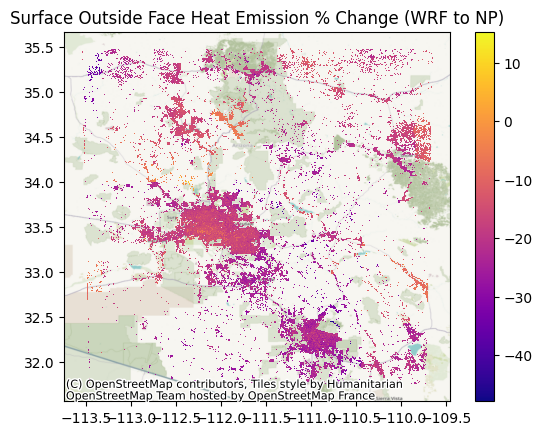

In [8]:
ax = gdf.plot(column='Surface_Outside_Face_Heat_Emission_change', legend=True, cmap='plasma')
cx.add_basemap(ax, crs="epsg:4326")
ax.set_title('Surface Outside Face Heat Emission % Change (WRF to NP)')

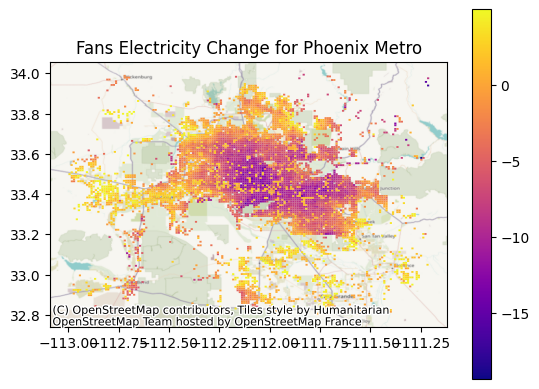

In [84]:
# we can actually show some variety in the phoenix metro when using bounds

from shapely.geometry import Polygon
bounds = Polygon([(-113, 34),(-113, 32.8),(-111.2, 32.8),(-111.2, 34)])
ax = gdf[(gdf.within(bounds)) & (gdf['Fans_Electricity_change'] > -20) & (gdf['Fans_Electricity_change'] < 5)].plot(column='Fans_Electricity_change', legend=True, cmap='plasma')
ax.set_title('Fans Electricity Change for Phoenix Metro')
cx.add_basemap(ax, crs="epsg:4326")

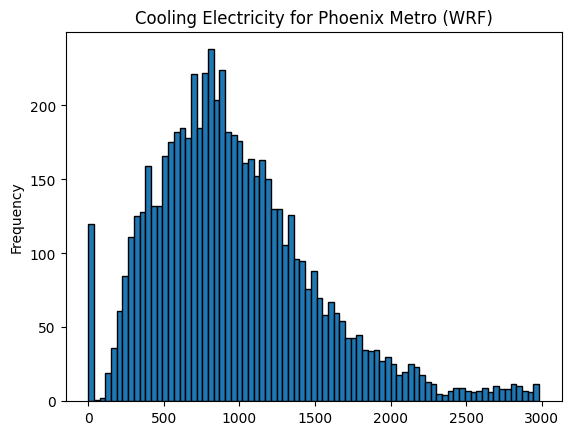

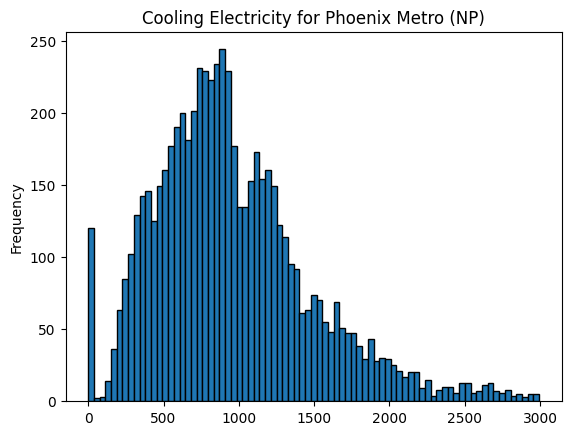

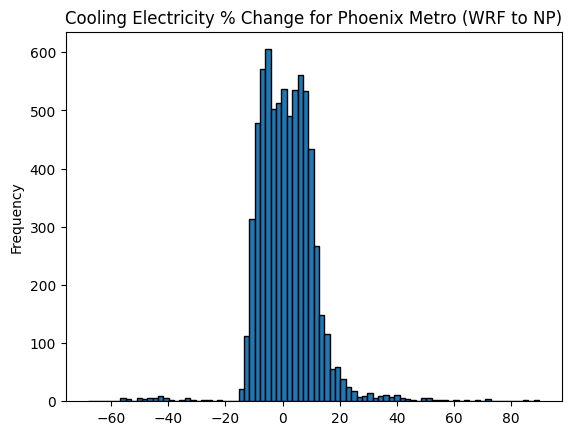

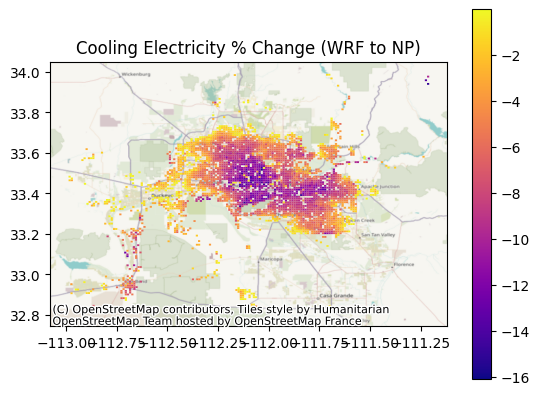

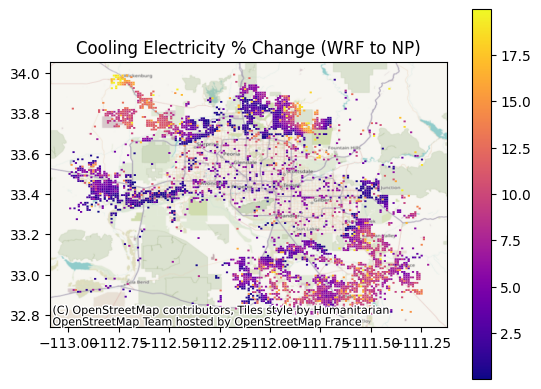

In [10]:
# this cell shows that for "phoenix metro" (as defined in bounds above), 

fans_elect = gdf[(gdf.within(bounds)) & (gdf['Cooling_El'] < 3000)]['Cooling_El']
ax = fans_elect.plot.hist(edgecolor='black', bins=int(np.sqrt(len(fans_elect.index))))
ax.set_title('Cooling Electricity for Phoenix Metro (WRF)')
plt.show()

fans_elect = gdf[(gdf.within(bounds)) & (gdf['Cooling__1'] < 3000)]['Cooling__1']
ax = fans_elect.plot.hist(edgecolor='black', bins=int(np.sqrt(len(fans_elect.index))))
ax.set_title('Cooling Electricity for Phoenix Metro (NP)')
plt.show()

fans_elect = gdf[(gdf.within(bounds)) & (gdf['Cooling_Electricity_change'] < 100)]['Cooling_Electricity_change']
ax = fans_elect.plot.hist(edgecolor='black', bins=int(np.sqrt(len(fans_elect.index))))
ax.set_title('Cooling Electricity % Change for Phoenix Metro (WRF to NP)')
plt.show()

ax = gdf[(gdf.within(bounds)) & (gdf['Cooling_Electricity_change'] > -20) & (gdf['Cooling_Electricity_change'] < 0)].plot(column='Cooling_Electricity_change', legend=True, cmap='plasma')
ax.set_title('Cooling Electricity % Change (WRF to NP)')
cx.add_basemap(ax, crs="epsg:4326")

ax = gdf[(gdf.within(bounds)) & (gdf['Cooling_Electricity_change'] > 0) & (gdf['Cooling_Electricity_change'] < 20)].plot(column='Cooling_Electricity_change', legend=True, cmap='plasma')
ax.set_title('Cooling Electricity % Change (WRF to NP)')
cx.add_basemap(ax, crs="epsg:4326")


Text(0.5, 1.0, 'Number of buildings')

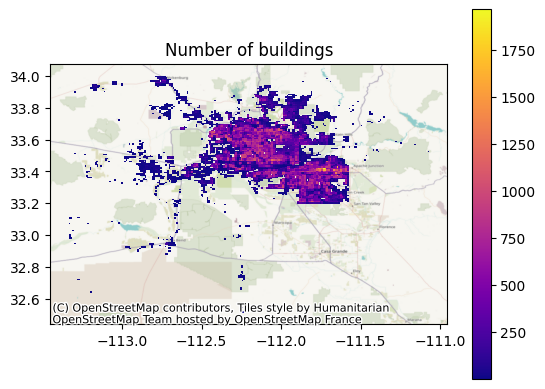

In [11]:
# get and plot building density data
tmp = pd.read_csv('maricopa_bldgs.csv')
bldgs_df = gpd.GeoDataFrame(geometry=gpd.points_from_xy(tmp['1'], tmp['0']))
gdf_bldgs = gdf.join(gpd.sjoin(bldgs_df, gdf).groupby('index_right').size().rename('bldg_num'), how='left').fillna(0)
bldg_mask = gdf_bldgs['bldg_num'] > 0
ax = gdf_bldgs[bldg_mask].plot(column='bldg_num', legend=True, cmap='plasma')
cx.add_basemap(ax, crs="epsg:4326")
ax.set_title('Number of buildings')

percent_change(np.array([np_total]), np.array([wrf_total]))=array([3.00695978])


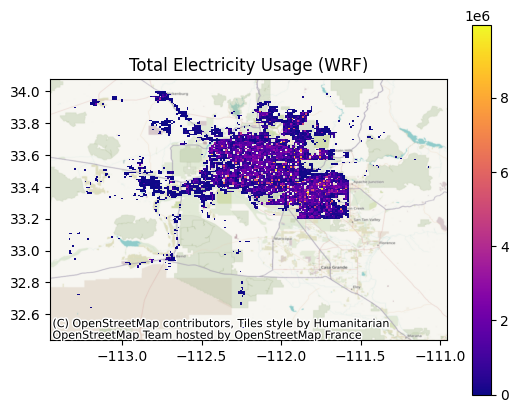

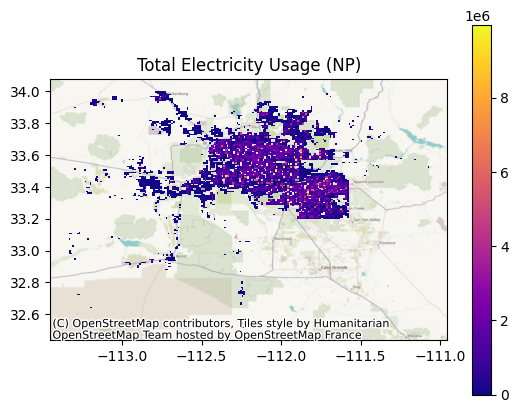

In [13]:
gdf_bldgs['electricity_total'] = gdf_bldgs['bldg_num'] * gdf_bldgs['Electricit']
ax = gdf_bldgs[bldg_mask & (gdf_bldgs['electricity_total'] < 10_000_000)].plot(column='electricity_total', legend=True, cmap='plasma')
cx.add_basemap(ax, crs="epsg:4326")
ax.set_title('Total Electricity Usage (WRF)')

wrf_total = gdf_bldgs[bldg_mask & (gdf['Fans_Electricity_change'] < 0) & (gdf_bldgs['electricity_total'] < 10_000_000)]['electricity_total'].sum()

gdf_bldgs['electricity_total'] = gdf_bldgs['bldg_num'] * gdf_bldgs['Electric_1']
ax = gdf_bldgs[bldg_mask & (gdf_bldgs['electricity_total'] < 10_000_000)].plot(column='electricity_total', legend=True,
                                                                              cmap='plasma')
cx.add_basemap(ax, crs="epsg:4326")
ax.set_title('Total Electricity Usage (NP)')

# a bit cheeky but i use the fans_electricity_change < 0 to set a bound around the urban areas of Phoenix
np_total = gdf_bldgs[bldg_mask & (gdf['Fans_Electricity_change'] < 0) & (gdf_bldgs['electricity_total'] < 10_000_000)]['electricity_total'].sum()
print(f'{percent_change(np.array([np_total]), np.array([wrf_total]))=}')